Cobertura da vangurada: 


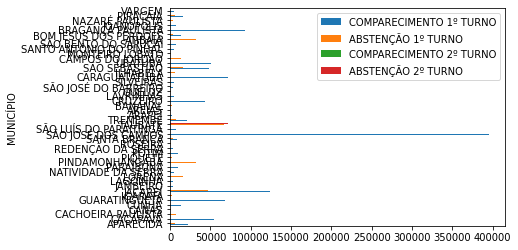

In [19]:
# 4.4
import pandas as pd
import plotly.graph_objects as go
from cobertura import abrangencia
import csv

csvPerfilComparecimentoAbstencao2020 = './dados/perfil_comparecimento_abstencao_2020.csv'
dataPerfilComparecimentoAbstencao2020 = pd.read_csv(csvPerfilComparecimentoAbstencao2020, sep= ';', encoding='ISO-8859-1')

def createQuery(list):
        count = 0
        query = ""

        for abr_code in list:
                query += 'CD_MUNICIPIO == ' + str(abr_code["codigo"])
                count += 1
                if count < len(list):
                        query += ' or '
        return query

query = createQuery(abrangencia)
dfAbstencaoEleicao2020 = pd.DataFrame(data = dataPerfilComparecimentoAbstencao2020.query(query), columns=['CD_MUNICIPIO', 'NR_TURNO', 'QT_ABSTENCAO', 'QT_COMPARECIMENTO'])

def generateChart(list, label): 
        listResults = []
        for abr_code in list:
                filtroCidade = pd.DataFrame(data = dfAbstencaoEleicao2020.query('CD_MUNICIPIO == ' + str(abr_code["codigo"])))
                filtroTurno1 = filtroCidade.query('NR_TURNO == 1')
                filtroTurno2 = filtroCidade.query('NR_TURNO == 2')

                comp_turno_1 = filtroTurno1.QT_COMPARECIMENTO.sum()
                abs_turno_1 = filtroTurno1.QT_ABSTENCAO.sum()

                comp_turno_2 = filtroTurno2.QT_COMPARECIMENTO.sum()
                abs_turno_2 = filtroTurno2.QT_ABSTENCAO.sum()

                # dft = pd.DataFrame({"REGIÃO":abr_code["regiao"], "MUNICÍPIO":abr_code["cidade"], "COMPARECIMENTO 1º TURNO":[comp_turno_1], "ABSTENÇÃO 1º TURNO": [abs_turno_1], "COMPARECIMENTO 2º TURNO":[comp_turno_2], "ABSTENÇÃO 2º TURNO": [abs_turno_2]})
                dft = pd.DataFrame({"REGIÃO":abr_code["regiao"], "MUNICÍPIO":abr_code["cidade"], "ABSTENÇÃO 1º TURNO": [abs_turno_1], "ABSTENÇÃO 2º TURNO": [abs_turno_2]})
                listResults.append(dft)

        dfm = pd.concat(listResults)
        print(label)
        dfm.plot(kind="barh", x="MUNICÍPIO")

generateChart(abrangencia, 'Cobertura da vangurada: ')




VALE DO PARAIBA


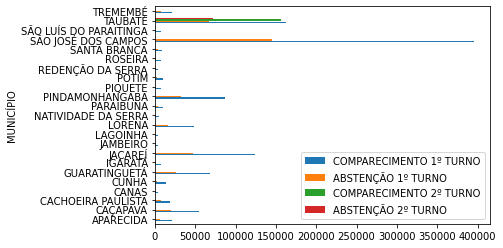

In [21]:
regiao = "VALE DO PARAIBA"
listaCidades = []

for abr_item in abrangencia:
    if abr_item['regiao'] == regiao:
        listaCidades.append(abr_item)

query = createQuery(listaCidades)
generateChart(listaCidades, regiao)